In [ ]:
!pip install bs4

In [ ]:
!pip install requests

In [ ]:
!pip install konlpy

     |████████████████████████████████| 19.4MB 7.9MB/s 
     |████████████████████████████████| 450kB 26.5MB/s 
     |████████████████████████████████| 92kB 10.9MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [ ]:
from bs4 import BeautifulSoup
from urllib.request import urlopen

html = urlopen('https://novel.naver.com/webnovel/detail.nhn?novelId=765207&volumeNo=262')
src = html.read()
html.close()

soup = BeautifulSoup(src, 'lxml')
print(soup)

<!DOCTYPE html>
<html lang="ko">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta contents="always" name="referrer"/>
<title>262화. 행복, 재혼 황후 : 네이버웹소설</title>
<link href="https://ssl.pstatic.net/static/m/novel/icon_2020/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<link href="https://ssl.pstatic.net/static/novel/naverwebnovel_32x32.png" rel="icon" sizes="32x32"/>
<link href="/css/novel.css?1623222261000" rel="stylesheet" type="text/css"/>
<style>
	.ly_event_contest{position:absolute;top:171px;left:50%;z-index:1110;width:560px;height:626px;margin:0 0 0 -280px;}
.ly_event_contest .contest_img{position:absolute;top:0;left:0;z-index:10;width:560px;height: 626px;background:url(https://ssl.pstatic.net/static/novel/evt_2021_greatest_contest.png) no-repeat;}
.ly_event_contest .contest_cont{overflow:auto;width:100%;height:626px;color:transparent;}
.ly_event_contest .lk_notice_read{overflow:hidden;position:absolute;left:160px;bottom:70px;width:

In [ ]:
content = soup.find(id='content')

In [ ]:
#print(content)
#print(soup.select_one('.detail_view_content').get_text())

In [ ]:
f = open('./재혼황후.txt', 'w')
f.write(soup.select_one('.detail_view_content').get_text())
f.close()

https://hogni.tistory.com/21


https://nwy1996.tistory.com/54


http://cedartrees.co.kr/index.php/2021/01/23/sequence2sequence-nlg/


https://wikidocs.net/24996

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

import numpy as np
import pandas as pd
import os
from argparse import Namespace
from collections import Counter

In [ ]:
config = Namespace(
    train_file='/content/재혼황후.txt', seq_size=7, batch_size=100,
)

In [ ]:
with open(config.train_file, 'r', encoding='utf-8') as f:
    text = f.read()
text_ = text.split('\n')
text = text.split()

In [ ]:
from konlpy.tag import Twitter
from wordcloud import WordCloud
from konlpy.tag import Twitter
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def make_wordcloud(word_count, text_):
    twitter = Twitter()
    sentences_tag = []
    #형태소 분석하여 리스트에 넣기
    for sentence in text_:
        morph = twitter.pos(sentence)
        sentences_tag.append(morph)
        #print(morph)
        #print('-'*30)
    #print(sentences_tag)
    #print('\n'*3)

    noun_adj_list = []
    #명사 형용사만 구분하여 리스트에 넣기
    for sentence1 in sentences_tag:
        for word, tag in sentence1:
            if tag in ['Noun','Adjective']:
                noun_adj_list.append(word)
    
    #형태소별 count
    counts = Counter(noun_adj_list)
    tags = counts.most_common(word_count)
    #print(tags)

    #wordCloud 생성
    #한글이 깨지는 문제 해결하기 위해서 font_path 지정
    wc = WordCloud(font_path='/content/NanumGothic.ttf', background_color='white', width=800, height=600)
    #wc = WordCloud(background_color='white', width=600, height=800)
    print(dict(tags))
    cloud = wc.generate_from_frequencies(dict(tags))
    plt.figure(figsize=(10,8))
    plt.axis('off')
    plt.imshow(cloud)
    plt.show()

/usr/local/lib/python3.7/dist-packages/konlpy/tag/_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


{'그': 36, '마스': 26, '스': 26, '르베티': 24, '내': 21, '하인': 20, '리': 17, '아이': 15, '사람': 14, '로라': 13, '말': 12, '나': 12, '안': 12, '때': 11, '라리': 11, '퀸': 11, '카이': 10, '눈': 10, '형': 10, '손': 9, '그때': 9, '고개': 8, '모습': 8, '자신': 8, '이': 8, '거': 8, '그대': 8, '있었다': 7, '난': 7, '걸': 7, '얼굴': 6, '황후': 6, '폐하': 6, '듯': 6, '위': 6, '후': 6, '자기': 6, '것': 6, '위해': 6, '공작': 6, '에르': 6, '기': 6, '복수': 6, '입': 6, '좋은': 5, '건': 5, '백작부인': 5, '커다란': 5, '번': 5, '시선': 5}


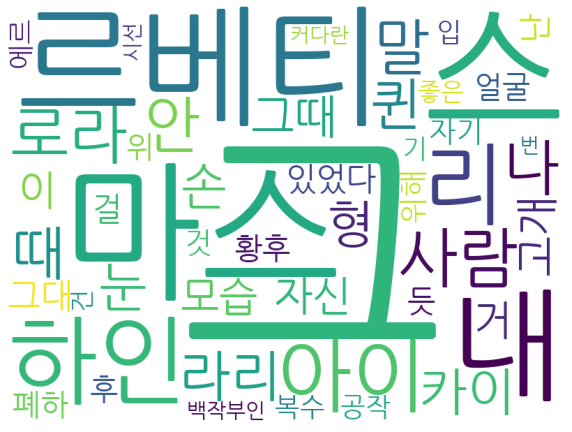

In [ ]:
make_wordcloud(50, text)

/usr/local/lib/python3.7/dist-packages/konlpy/tag/_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


{'그': 36, '마스': 26, '스': 26, '르베티': 24, '내': 21, '하인': 20, '리': 17, '아이': 15, '사람': 14, '로라': 13, '말': 12, '나': 12, '안': 12, '때': 11, '라리': 11, '퀸': 11, '카이': 10, '눈': 10, '형': 10, '손': 9, '그때': 9, '고개': 8, '모습': 8, '자신': 8, '이': 8, '거': 8, '그대': 8, '있었다': 7, '난': 7, '걸': 7, '얼굴': 6, '황후': 6, '폐하': 6, '듯': 6, '위': 6, '후': 6, '자기': 6, '것': 6, '위해': 6, '공작': 6, '에르': 6, '기': 6, '복수': 6, '입': 6, '좋은': 5, '건': 5, '백작부인': 5, '커다란': 5, '번': 5, '시선': 5}


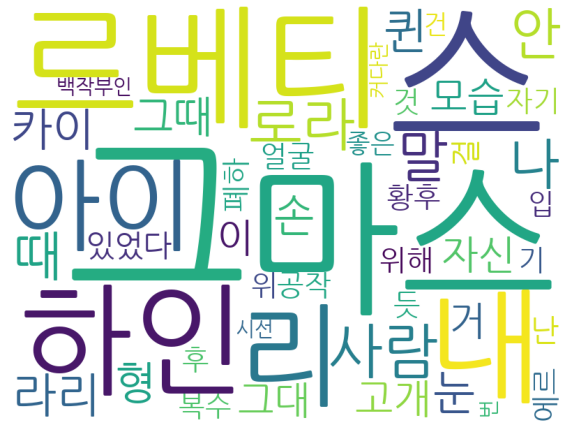

In [ ]:
make_wordcloud(50, text_)

학습을 위해 중복 단어를 제거하고, word2index, index2word 형태의 데이터셋을 생성한다. 

이렇게 만들어진 데이터셋을 통해서 각 문장을 어절 단위로 분리하고 각 배열의 인덱스값을 맵핑해서 

문장을 숫자 형태의 값을 가진 데이터로 변경한다.

In [ ]:
word_counts = Counter(text)
sorted_vocab = sorted(word_counts, key=word_counts.get, reverse=True)
int_to_vocab = {k: w for k, w in enumerate(sorted_vocab)}
vocab_to_int = {w: k for k, w in int_to_vocab.items()}
n_vocab = len(int_to_vocab)

print('Vocab size', n_vocab)

int_text = [vocab_to_int[w] for w in text] # 전체 텍스트를 index로 변경

Vocab size 1271


학습을 위한 데이터를 만드는 과정

데이터는 source_word와 target_word로 분리한다.

source_word는 [‘In’, ‘the’, ‘beginning,’, ‘God’, ‘created’, ‘the’, ‘heavens’],

target_word는 [ ‘the’, ‘beginning,’, ‘God’, ‘created’, ‘the’, ‘heavens’,’and’] 형태이다.

즉, source_word 문장 배열 다음에 target_word가 순서대로 등장한다는 것을 모델이 학습하도록 한다.

여기서 문장의 크기는 7로 정한다. 더 큰 사이즈로 학습을 진행하면 문장을 생성할 때 더 좋은 예측을 할 수 있으나, 

계산량이 많아져서 학습 시간이 많이 필요하다.



In [ ]:
source_words = []
target_words = []
for i in range(len(int_text)):
    ss_idx, se_idx, ts_idx, te_idx = i, (config.seq_size+i), i+1, (config.seq_size+i)+1
    if len(int_text[ts_idx:te_idx]) >= config.seq_size:
        source_words.append(int_text[ss_idx:se_idx])
        target_words.append(int_text[ts_idx:te_idx])

In [ ]:
for s,t in zip(source_words[0:10], target_words[0:10]):
    print('source {} -> target {}'.format(s,t))

source [253, 254, 255, 26, 256, 257, 258] -> target [254, 255, 26, 256, 257, 258, 259]
source [254, 255, 26, 256, 257, 258, 259] -> target [255, 26, 256, 257, 258, 259, 260]
source [255, 26, 256, 257, 258, 259, 260] -> target [26, 256, 257, 258, 259, 260, 261]
source [26, 256, 257, 258, 259, 260, 261] -> target [256, 257, 258, 259, 260, 261, 262]
source [256, 257, 258, 259, 260, 261, 262] -> target [257, 258, 259, 260, 261, 262, 7]
source [257, 258, 259, 260, 261, 262, 7] -> target [258, 259, 260, 261, 262, 7, 92]
source [258, 259, 260, 261, 262, 7, 92] -> target [259, 260, 261, 262, 7, 92, 48]
source [259, 260, 261, 262, 7, 92, 48] -> target [260, 261, 262, 7, 92, 48, 49]
source [260, 261, 262, 7, 92, 48, 49] -> target [261, 262, 7, 92, 48, 49, 93]
source [261, 262, 7, 92, 48, 49, 93] -> target [262, 7, 92, 48, 49, 93, 94]


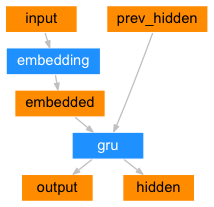

아래는 Encoder의 구조이다. Encoder는 두 개의 값이 GRU Cell로 들어가게 된다. 

하나는 입력 값이 Embedding layer를 통해서 나오는 값과 또 하나는 이전 단계의 Hidden 값이다. 

최종 Hidden 값은 입력된 문장의 전체 정보를 어떤 고정된 크기의 Context Vector에 축약하고 있기 때문에 

이 값을 Decoder의 입력으로 사용한다. 

In [ ]:
class Encoder(nn.Module):
    def __init__(self, input_size, hidden_size):
        super().__init__()
        self.hidden_size = hidden_size
        self.embedding = nn.Embedding(input_size, hidden_size) #199->10
        self.gru = nn.GRU(hidden_size, hidden_size) #20-20

    def forward(self, x, hidden):
        x = self.embedding(x).view(1,1,-1)
        output = x
        output, hidden = self.gru(output, hidden)
        return output, hidden
    
    def initHidden(self):
        return torch.zeros(1, 1, self.hidden_size)

아래 그림과 같이 Decoder를 설계. Decoder 역시 GRU cell을 가지고 있다.

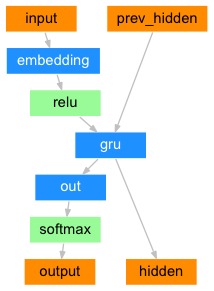

In [ ]:
class Decoder(nn.Module):
    def __init__(self, hidden_size, output_size):
        super().__init__()
        self.hidden_size = hidden_size
        self.embedding = nn.Embedding(output_size, hidden_size) #199->10
        self.gru = nn.GRU(hidden_size, hidden_size) #10->10
        self.out = nn.Linear(hidden_size, output_size) #10->199
        self.softmax = nn.LogSoftmax(dim=1)
        
    def forward(self, x, hidden):
        x = self.embedding(x).view(1,1,-1)
        x, hidden = self.gru(x, hidden)
        x = self.softmax(self.out(x[0]))
        return x, hidden

In [ ]:
class AttnDecoder(nn.Module):
    def __init__(self, hidden_size, output_size, dropout_p=0.1):
        super(AttnDecoder, self).__init__()
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.dropout_p = dropout_p
        self.max_length = 50

        self.embedding = nn.Embedding(self.output_size, self.hidden_size)
        self.attn = nn.Linear(self.hidden_size * 2, self.max_length)
        self.attn_combine = nn.Linear(self.hidden_size * 2, self.hidden_size)
        self.dropout = nn.Dropout(self.dropout_p)
        self.gru = nn.GRU(self.hidden_size, self.hidden_size)
        self.out = nn.Linear(self.hidden_size, self.output_size)
    
    def forward(self, input, hidden, encoder_outputs):
        embedded = self.embedding(input).view(1,1,-1)
        #embedded = self.dropout(embedded)
        attn_weights = F.softmax(self.attn(torch.cat((embedded[0], hidden[0]),1)), dim=1)
        #print(attn_weights.shape, encoder_outputs.shape)
        attn_applied = torch.mul(attn_weights.unsqueeze(0), encoder_outputs)
        output = torch.cat((embedded[0], attn_applied[0]),1)
        output = self.attn_combine(output).unsqueeze(0)
        output = F.relu(output)
        output, hidden = self.gru(output, hidden)
        output = F.log_softmax(self.out(output[0]), dim=1)

        return output, hidden, attn_weights

In [ ]:
enc_hidden_size = 50
dec_hidden_size = enc_hidden_size
encoder = Encoder(n_vocab, enc_hidden_size) # source(199) -> embedding(10)
decoder = AttnDecoder(dec_hidden_size, n_vocab) # embedding(199) -> target(199)
encoder_optimizer = optim.SGD(encoder.parameters(), lr=0.01)
decoder_optimizer = optim.SGD(decoder.parameters(), lr=0.01)
criterion = nn.NLLLoss()

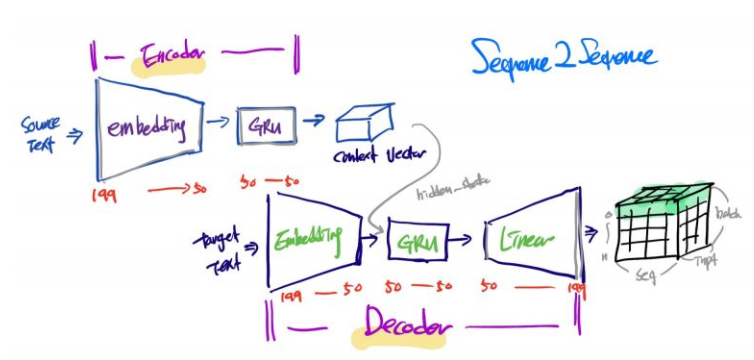

Encoder

    (embedding): Embedding(199, 50)
    (gru): GRU(50, 50)




Decoder

    (embedding): Embedding(199, 50)
    (gru): GRU(50, 50)
    (out): Linear(in_features=50, out_features=199, bias=True)
    (softmax): LogSoftmax(dim=1)




데이터를 100개씩 나눠서 훈련할 수 있도록 배치 모델을 작성.


In [ ]:
pairs = list(zip(source_words, target_words))
def get_batch(pairs, batch_size):
  pairs_length = len(pairs)
  for ndx in range(0, pairs_length, batch_size):
    #print(ndx, min(ndx+batch_size, pairs_length))
    yield pairs[ndx:min(ndx+batch_size, pairs_length)]

500번 학습을 수행. 각 batch, epoch 마다 loss 표시.

In [ ]:
number_of_epochs = 101
for epoch in range(number_of_epochs):
    total_loss = 0
    #for pair in get_batch(pairs, config.batch_size): # batch_size 100
    for pair in get_batch(pairs, 100): # batch_size 100
      batch_loss = 0
       
      for si, ti in pair:
        x = torch.Tensor(np.array([si])).long().view(-1,1)
        y = torch.Tensor(np.array([ti])).long().view(-1,1)
        encoder_hidden = torch.zeros(1,1,enc_hidden_size)
        for j in range(config.seq_size):
            encoder_output, encoder_hidden = encoder(x[j], encoder_hidden)
        decoder_hidden = encoder_hidden
        decoder_input = torch.Tensor([[0]]).long()
        loss = 0
        for k in range(config.seq_size):
            decoder_output, decoder_hidden, decoder_attn_weight = decoder(decoder_input, decoder_hidden, encoder_output)
            decoder_input = y[k]
            loss += criterion(decoder_output, y[k])
        batch_loss += loss.item()/config.seq_size
        encoder_optimizer.zero_grad()
        decoder_optimizer.zero_grad()
        loss.backward()
        encoder_optimizer.step()
        decoder_optimizer.step()
      total_loss += batch_loss/config.batch_size
      #print('batch_loss {:.5f}'.format(batch_loss/config.batch_size))
    print('epoch {}, loss {:.10f}'.format(epoch, total_loss/(len(pairs)//config.batch_size)))

epoch 0, loss 6.7351360228
epoch 1, loss 5.6911553215
epoch 2, loss 4.6235853110
epoch 3, loss 3.5902998059
epoch 4, loss 2.7378322415
epoch 5, loss 2.1258775707
epoch 6, loss 1.7483125268
epoch 7, loss 1.5291517609
epoch 8, loss 1.3846243622
epoch 9, loss 1.2951352243
epoch 10, loss 1.2243314526
epoch 11, loss 1.1757465358
epoch 12, loss 1.1291597847
epoch 13, loss 1.0847400385
epoch 14, loss 1.0442270985
epoch 15, loss 0.9970139212
epoch 16, loss 0.9501477270
epoch 17, loss 0.9125660858
epoch 18, loss 0.8736571922
epoch 19, loss 0.8122854470
epoch 20, loss 0.7736427795
epoch 21, loss 0.7454332954
epoch 22, loss 0.7139347678
epoch 23, loss 0.6760122368
epoch 24, loss 0.6406143367
epoch 25, loss 0.6043112857
epoch 26, loss 0.5810661771
epoch 27, loss 0.5503738128
epoch 28, loss 0.5455209868
epoch 29, loss 0.5398107771
epoch 30, loss 0.5077697144
epoch 31, loss 0.4656555256
epoch 32, loss 0.4416237537
epoch 33, loss 0.4096362777
epoch 34, loss 0.4052024485
epoch 35, loss 0.3659530556
ep

In [ ]:
torch.save({
  'encoder': encoder.state_dict(), 'decoder':decoder.state_dict(),
  'config': config,
}, '/content/drive/MyDrive/대학원/2학기/빅데이터딥러닝/과제3/model.210524')

학습이 완료된 후에 해당 모델이 잘 학습되었는지,

"고개를 돌려"라는 몇가지 단어를 주고 모델이 어떤 문장을 생성하는지를 알아보는 방식으로 수행.



In [ ]:
decoded_words = []
words = [vocab_to_int['고개를'], vocab_to_int['돌려']]
x = torch.Tensor(words).long().view(-1,1)
encoder_hidden = torch.zeros(1,1,enc_hidden_size)
for j in range(x.size(0)):
    encoder_output, encoder_hidden = encoder(x[j], encoder_hidden)
decoder_hidden = encoder_hidden
decoder_input = torch.Tensor([[words[1]]]).long()  
for di in range(20):
  decoder_output, decoder_hidden, decoder_attn_weight = decoder(decoder_input, decoder_hidden, encoder_output)
  _, top_index = decoder_output.data.topk(1)
  decoded_words.append(int_to_vocab[top_index.item()])
  decoder_input = top_index.squeeze().detach()
predict_words = decoded_words    
predict_sentence = ' '.join(predict_words)
print(predict_sentence)

하인리를 살폈다. 혹시 그가 지금도 우는지 보려고. 하인리는 들릴 듯 말 듯한 목소리로 자장가를 부르고 있었다. 그러다 내 시선을 느꼈는지,


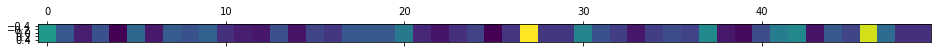

In [ ]:
import matplotlib.pyplot as plt

plt.matshow(decoder_attn_weight.detach().numpy())